In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end
include(pathtorepo * "/system.jl");

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra
using JLD2

In [3]:
cd("/home/sergey/work/repo/dynamical-systems/Tsodyks Markram/Article Chaos/Сопоставление с матконт/файлы matlab")
vars = load("vars.jld");
vars = vars["data"];

len_vars = length(vars);
lenarray = Int64(len_vars/3);
dim = 3;
phase_vars = zeros(lenarray, dim);
step = 1;
for index in range(1, len_vars, step = 3)

    phase_vars[step, 1] = vars[index];
    phase_vars[step, 2] = vars[index+1];
    phase_vars[step, 3] = vars[index+2];
    step+=1;

end

In [4]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

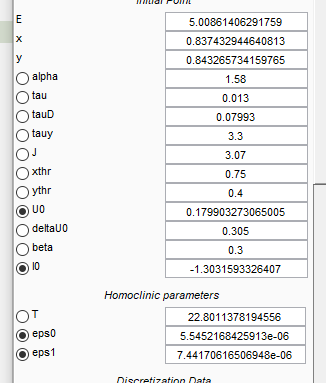

In [5]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [6]:
I0 = -1.30325707678393;
U0 = 0.179912348928550;
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = zeros(3);

In [7]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.17991234892855, 0.305, 0.3, -1.30325707678393]
 time:          0.0
 state:         [0.0, 0.0, 0.0]


In [8]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [9]:
fp

3-dimensional StateSpaceSet{Float64} with 3 points
 1.87017  0.932413  0.964878
 5.01716  0.837198  0.842678
 5.00788  0.83745   0.84331

In [10]:
ei[3]

3-element Vector{ComplexF64}:
 -0.44194935289361115 + 0.0im
  -0.3030219087011621 + 0.0im
  0.44928846869812933 + 0.0im

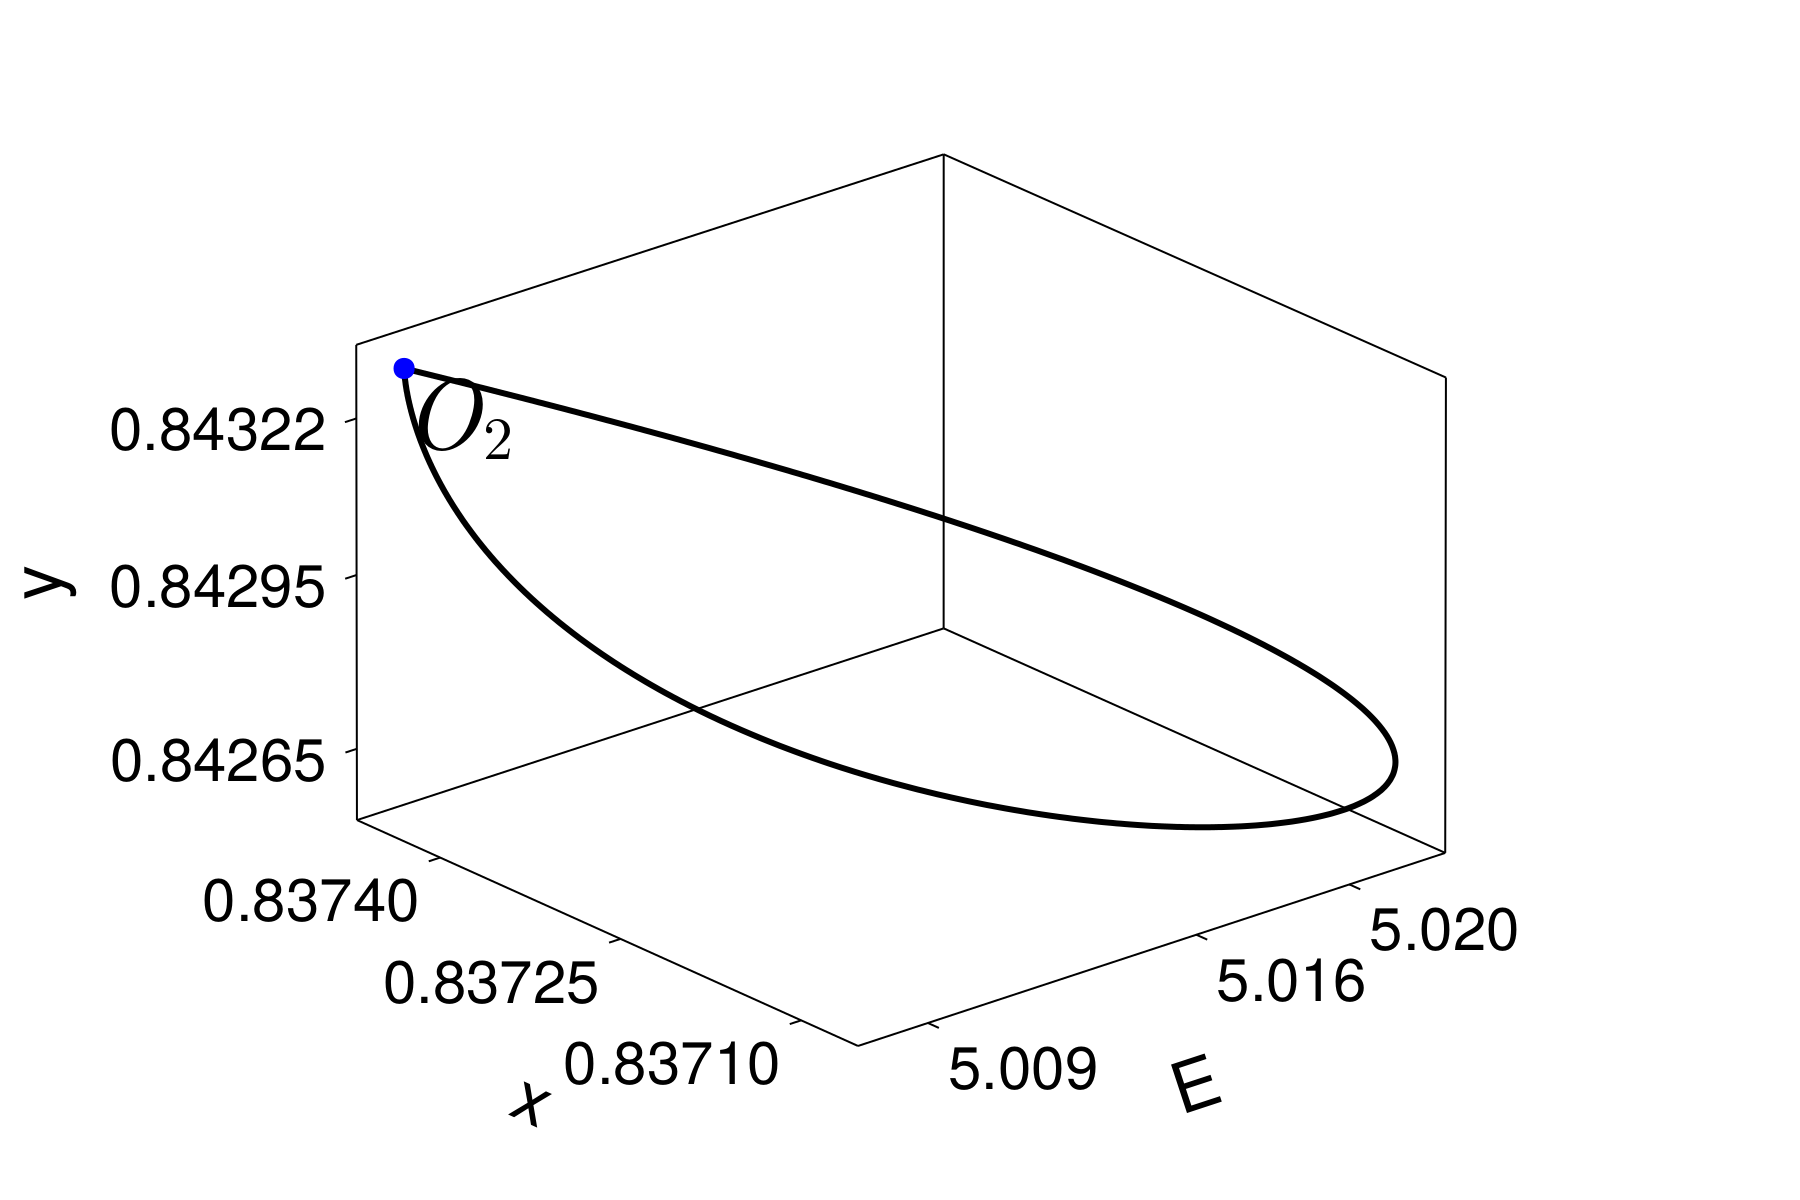

CairoMakie.Screen{IMAGE}


In [11]:
index_fp = 3
idx, idy, idz = 1, 2, 3;
CairoMakie.activate!();
width = 900; height = 600;
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 70;
disz = 140;
f = Figure(size = (width, height));
axis3 = Axis3(f[1, 1],
            xlabel = "E", ylabel = "x", zlabel = "y",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
            xticks = [5.009, 5.016, 5.020], yticks = [0.8371, 0.83725, 0.8374], zticks = [0.84265, 0.84295, 0.84322])

lines!(axis3, phase_vars[:, idx], phase_vars[:, idy], phase_vars[:, idz], color = :black, linewidth = 3.0);

scatter!(axis3, fp[index_fp, idx], fp[index_fp, idy], fp[index_fp, idz], color = :blue, markersize = 15)
text!(axis3, fp[index_fp, idx], fp[index_fp, idy], fp[index_fp, idz], text = L"O_2", fontsize = 50, align = (:left, :top))#, offset = (10, -20))

display(f)

In [13]:
cd("/home/sergey/MEGA/dynamical-systems/Tsodyks Markram/images")
save("phase_port_homoclinic_to_saddle.pdf", f)

CairoMakie.Screen{PDF}
